<a href="https://colab.research.google.com/github/vishal2004-MH/AIML-/blob/main/Vishal_Shinde_P3(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pro 3: To extract features from given datasets and establish training data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
# Step 1: Load the Dataset from CSV
file_path = "synthetic_machining_data.csv" # Path to uploaded file
df = pd.read_csv(file_path)
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Spindle Speed (RPM)  Feed Rate (mm/min)  Cutting Force (N)  \
0          1549.671415          229.231463         103.577874   
1          1486.173570          278.967734         105.607845   
2          1564.768854          282.864274         110.830512   
3          1652.302986          259.886137         110.538021   
4          1476.584663          291.935714          86.223306   

   Vibration Level  Temperature (C)  
0         0.417100        32.027862  
1         0.443982        37.003125  
2         0.574729        40.026218  
3         0.561037        40.234903  
4         0.497910        37.749673  


In [ ]:
# Step 2: Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())



Missing Values in Dataset:
Spindle Speed (RPM)    0
Feed Rate (mm/min)     0
Cutting Force (N)      0
Vibration Level        0
Temperature (C)        0
dtype: int64


In [ ]:
# Step 3: Extract Features (Assuming last column is Target if it exists)
features = df.iloc[:, :-1] # Select all columns except the last one


In [ ]:
# Step 4: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


In [ ]:
# Step 5: Apply PCA (Reducing to 2 Principal Components)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [ ]:
# Step 6: Assign Target Variable
if 'Tool Wear Level' in df.columns: # If the dataset contains a target column
    pca_df['Tool Wear Level'] = df['Tool Wear Level']
else:
    tool_wear = np.digitize(features.sum(axis=1), bins=[4000, 4500]) # Generate synthetic target la
    pca_df['Tool Wear Level'] = tool_wear



In [ ]:
# Step 7: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
pca_df[['PC1', 'PC2']], pca_df['Tool Wear Level'], test_size=0.2, random_state=42 )
# Display the shapes of the training and testing datasets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (80, 2)
Testing Data Shape: (20, 2)


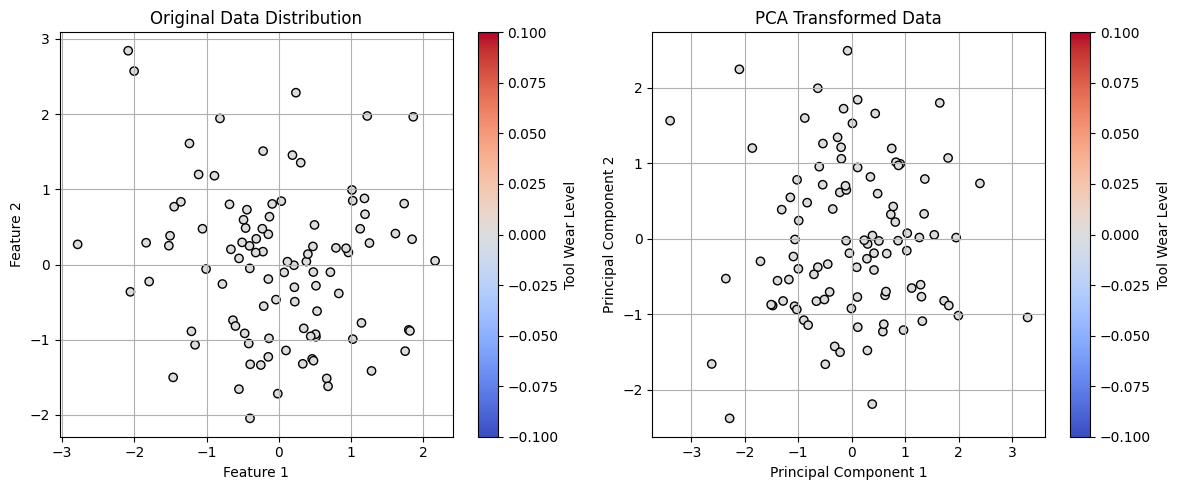

In [ ]:
import matplotlib.pyplot as plt

# Step 8: Visualization of Original Features vs PCA-transformed Features
# Plot 1: Original Data Distribution
plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=pca_df['Tool Wear Level'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data Distribution')
plt.colorbar(label='Tool Wear Level')
plt.grid()

# Plot 2: PCA Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Tool Wear Level'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.colorbar(label='Tool Wear Level')
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


Conclusion

PCA successfully reduced the original 5 features to 2 principal components, retaining most of the data variance.

Explained Variance Ratio shows the contribution of each component to data representation.

Scatter plots reveal clusters, showing how PCA helps in visualizing high-dimensional data
